In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units

import sys
sys.path.append('../../') # lets us import ptype package from the subdir

import sounding_utils
from importlib import reload

from functools import partial

#import ptype.

## Select forecast hour:

In [2]:
hour = '0000'

In [3]:
rap = xr.open_mfdataset(f"/glade/campaign/cisl/aiml/ptype/ptype_case_studies/kentucky/rap/20220223/{hour}/*.nc", concat_dim='time', combine='nested')
rap.attrs['nwp'] = 'rap'


In [4]:
hrrr = xr.open_mfdataset(f"/glade/campaign/cisl/aiml/ptype/ptype_case_studies/kentucky/hrrr/20220223/{hour}/*.nc", concat_dim='time', combine='nested')
hrrr.attrs['nwp'] = 'hrrr'


In [5]:
gfs = xr.open_mfdataset(f"/glade/campaign/cisl/aiml/ptype/ptype_case_studies/kentucky/gfs/20220223/{hour}/*.nc", concat_dim='time', combine='nested')
gfs.attrs['nwp'] = 'gfs'


In [6]:
datasets = [gfs, hrrr, rap]

**Recall our calibration plots:**

![alt text](soundings_files/MLCalibration.png "Calibration of ML model")

In [18]:
lat_max = min([ds.latitude.max() for ds in datasets])
lat_min = max([ds.latitude.min() for ds in datasets])
lon_max = min([ds.longitude.max() for ds in datasets])
lon_min = max([ds.longitude.min() for ds in datasets])

In [19]:
def filter_latlon(ds, lat_max, lat_min, lon_max, lon_min):
    mask = (
            (ds.latitude <= lat_max) &
            (ds.latitude >= lat_min) &
            (ds.longitude <= lon_max) &
            (ds.longitude >= lat_min)
           )
    return ds.where(mask)

In [20]:
datasets_filtered = [filter_latlon(ds,lat_max, lat_min, lon_max, lon_min) for ds in datasets]

In [23]:
reload(sounding_utils)
plot_func = partial(sounding_utils.composites_multiplot,
                    datasets = datasets_filtered,
                    x_col = 't_h',
                    colors = ['blue', 'orange'],
                    markers = ['o','v', '+'],
                    plot_median=True)

(<Figure size 500x500 with 1 Axes>,
 <SkewXAxes: title={'center': 'Median Interpolated t_h'}, xlabel='t_h', ylabel='Height above ground (m)'>)

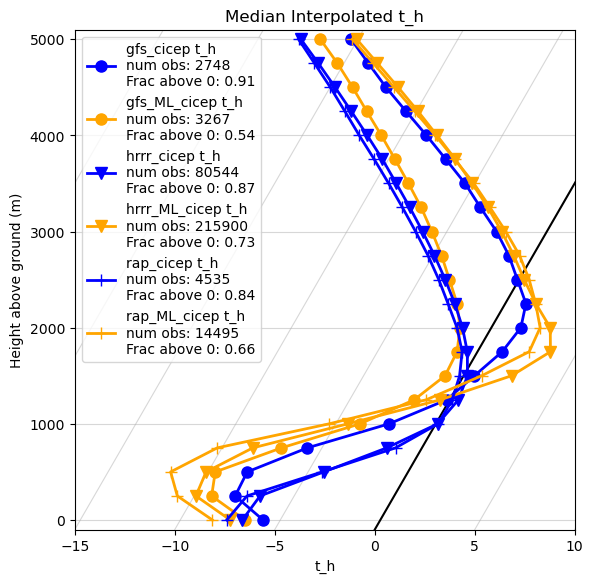

In [24]:
plot_func(cols=['cicep','ML_cicep'],xhighlim=10,xlowlim=-15)

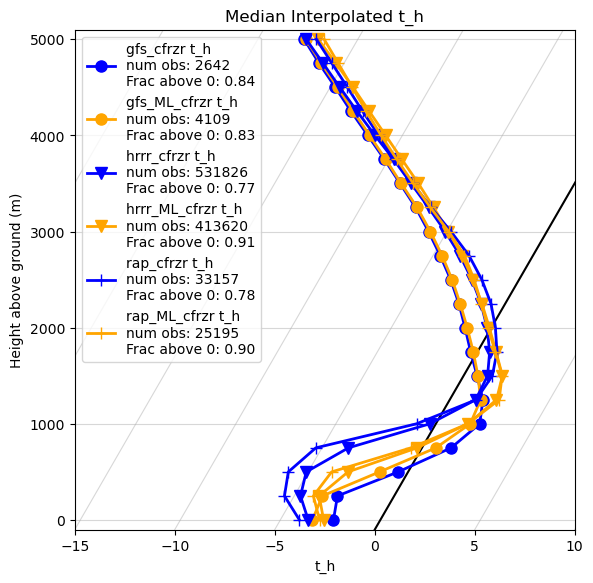

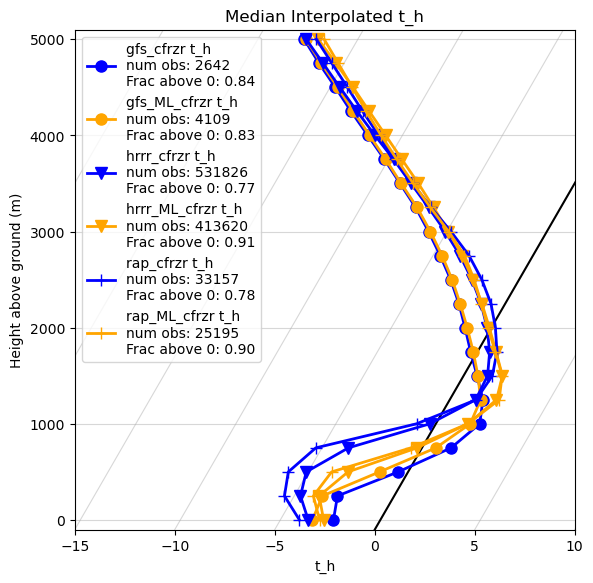

In [25]:
fig,ax=plot_func(cols=['cfrzr', 'ML_cfrzr'])
ax.set_xlim((-15,10))
fig

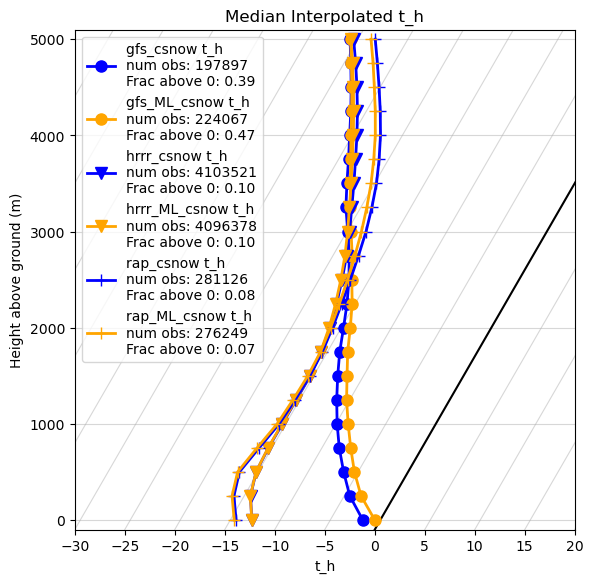

In [26]:
figS,axS = plot_func(cols=['csnow', 'ML_csnow'],xlowlim=-30)

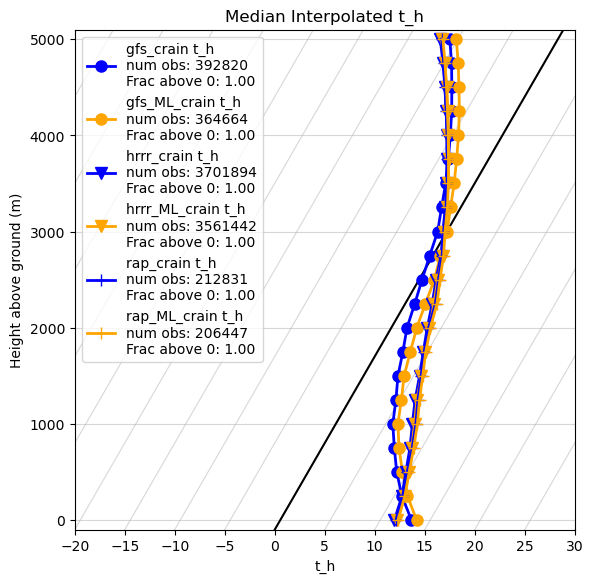

In [27]:

figR, axR = plot_func(cols=['crain', 'ML_crain'],xhighlim=30)

In [ ]:
gfs

In [ ]:
hrrr

In [ ]:
rap